In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/DEEP_LEARNING _DATASETS/preprocessed_malefemale/train", 
target_size=(28, 28),batch_size=30,class_mode='binary')


Found 341 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/DEEP_LEARNING _DATASETS/preprocessed_malefemale/validation",
    target_size=(28, 28),batch_size=30,class_mode="binary")

Found 160 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
"/content/drive/MyDrive/DEEP_LEARNING _DATASETS/preprocessed_malefemale/test",
target_size=(28, 28),
batch_size=30,
class_mode='binary')

Found 84 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=50,
epochs=25,
validation_data=validation_generator,validation_steps=50)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
50/50 [==============================] - 17s 319ms/step - loss: 0.6800 - acc: 0.5992 - val_loss: 0.6597 - val_acc: 0.7037
Epoch 2/25
50/50 [==============================] - 15s 311ms/step - loss: 0.6456 - acc: 0.6951 - val_loss: 0.6242 - val_acc: 0.6701
Epoch 3/25
50/50 [==============================] - 15s 310ms/step - loss: 0.6080 - acc: 0.7168 - val_loss: 0.5767 - val_acc: 0.7754
Epoch 4/25
50/50 [==============================] - 15s 312ms/step - loss: 0.5624 - acc: 0.7390 - val_loss: 0.5543 - val_acc: 0.7313
Epoch 5/25
50/50 [==============================] - 15s 310ms/step - loss: 0.5503 - acc: 0.7204 - val_loss: 0.5317 - val_acc: 0.7687
Epoch 6/25
50/50 [==============================] - 15s 308ms/step - loss: 0.5324 - acc: 0.7286 - val_loss: 0.5242 - val_acc: 0.7672
Epoch 7/25
50/50 [==============================] - 15s 313ms/step - loss: 0.5113 - acc: 0.7456 - val_loss: 0.5287 - val_acc: 0.7440
Epoch 8/25
50/50 [==============================] - 15s 310ms/step - 

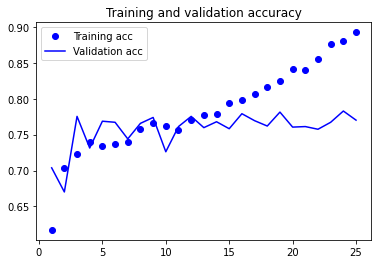

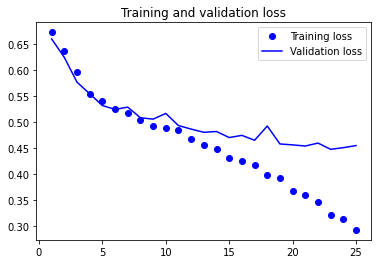

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
model.save('male_female_model_75_accuracy.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img = image.load_img("/content/drive/MyDrive/DEEP_LEARNING _DATASETS/MaleFemale v3.0/Female/100.png", target_size=(28, 28))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [ ]:
prediction

array([[0.25411224]], dtype=float32)

In [ ]:
img = image.load_img("/content/drive/MyDrive/DEEP_LEARNING _DATASETS/MaleFemale v3.0/Male/100.png", target_size=(28, 28))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [ ]:
prediction

array([[0.7887263]], dtype=float32)